In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch

if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
from t_core import volume_tools as vt

We can control length-scale of texture by setting speckle size and convolution kernel. The convolution kernel for Gaussian blur is in place just to avoid hard boundaries between voxels

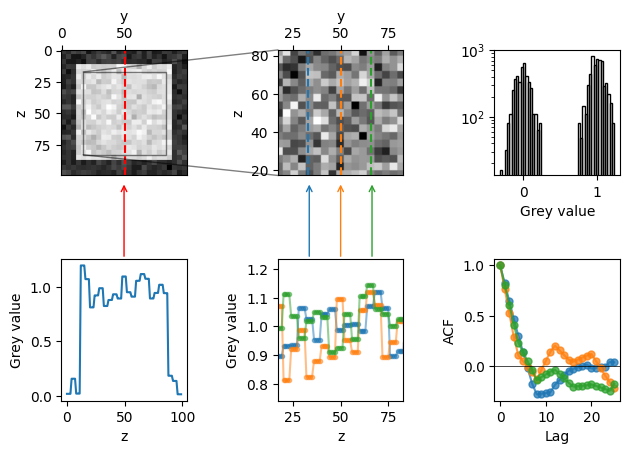

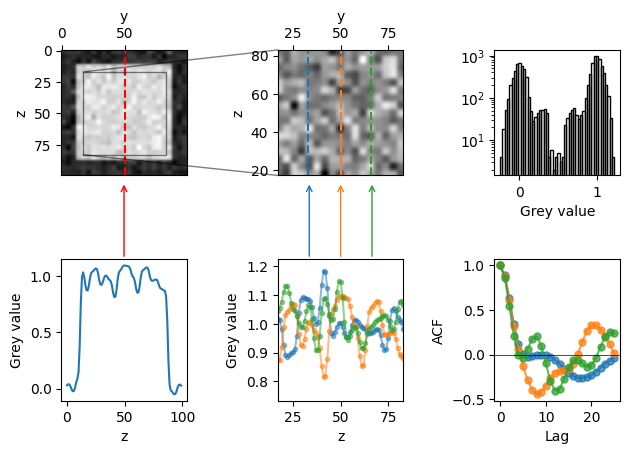

In [2]:
# with convolution_kernel=1, we don't apply blur
vol = vt.make_volume((100,100,100), speckle_size=4, convolution_kernel=1)
vt.plot_acf(vol)
# it is desirable to use some blurring
vol = vt.make_volume((100,100,100), speckle_size=4, convolution_kernel=5)
vt.plot_acf(vol)

Deformation field that we apply is inverse mapping. Therefore, to get a desired forward mapping, we use the new volume as the reference configuration.

**Note that the warping functions that go into ``deform_general`` are normalized to volume extent 0-1 for all axes**

Take the example of simple field
$$
z = Z + A \exp{\left( - \frac{Z^2}{\sigma^2} \right)}
$$

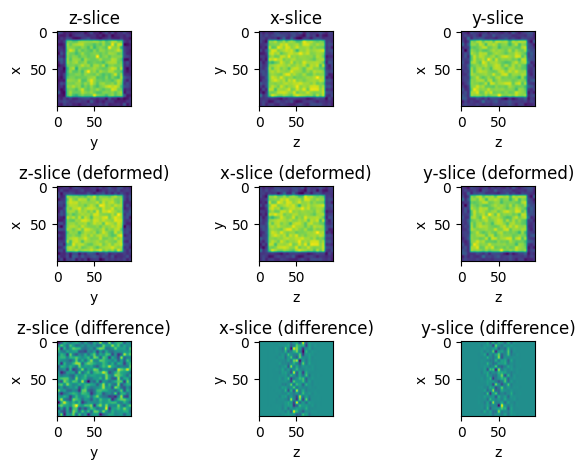

In [4]:
sigma_vox = 10 # voxels
sigma = sigma_vox / vol.shape[2] * 2
A_vox = 3 # voxels
# note for this type of field, the requirement for compatibility is
# A_vox < sigma_vox*exp(-0.5) ~ 1.65*sigma_vox
A_z = A_vox / vol.shape[2] * 2
z_func = lambda x,y,z: z + A_z*torch.exp(-0.5*(z**2/sigma**2))

undef_vol = vt.deform_general(
    vol, 
    x_func=lambda x,y,z: x,
    y_func=lambda x,y,z: y,
    z_func=z_func
)

vt.plot_undef_def_slices(undef_vol, vol)